
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Diego! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

### Paso 4. Análisis exploratorio de datos (Python)

In [1]:
# Carga de todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas del resto del código! Esto mejora la estructura y claridad de tu código.

</div>

In [2]:
# Carga los archivos de datos en un DataFrame para cada dataset
taxi_company = pd.read_csv('/datasets/project_sql_result_01.csv')
location_trip = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# Información general del DataFrame taxi_company
taxi_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Visualización de una muestra del DataFrame taxi_company
taxi_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
# Procedemos a revisar si existen filas duplicadas explícitas en el DataFrame taxi_company
taxi_company.duplicated().sum()

0

In [6]:
# Información general del DataFrame location_trip
location_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Visualización de una muestra del DataFrame location_trio
location_trip.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
# Procedemos a revisar si existen filas duplicadas explícitas en el DataFrame location_trip
location_trip.duplicated().sum()

0

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.


</div>

##### En el caso de la tabla taxi_company, no se han encontrado valores nulos ni duplicados explícitos; además de que se ha verificado que las columnas company_name y trips_amount poseen los tipos de datos adecuados (object e int64 respectivamente) según la naturaleza de la información que brindan; además se observa que los nombres de las columnas poseen nombres adecuados (caractéres en minúscula y con guiones en lugar de espacios en blanco para separar palabras), por lo que no se requiere modificar dichos nombres.
##### En el caso de la tabla location_trip, no se han encontrado valores nulos ni duplicados explícitos; además de que se ha verificado que las columnas dropoff_location_name y average_trips poseen los tipos de datos adecuados (object y float respectivamente) según la naturaleza de la información que brindan; además se observa que los nombres de las columnas poseen nombres adecuados (caractéres en minúscula y con guiones en lugar de espacios en blanco para separar palabras), por lo que no se requiere modificar dichos nombres.

In [9]:
# Se procede a identificar los 10 principales barrios en términos de finalización del recorrido
location_trip.sort_values('average_trips', ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [10]:
# Se procede a guardar los nombres de los barrios buscados en el código anterior en una lista
top_10_dropoff_location_name = location_trip.sort_values('average_trips', ascending = False).head(10)['dropoff_location_name'].tolist()

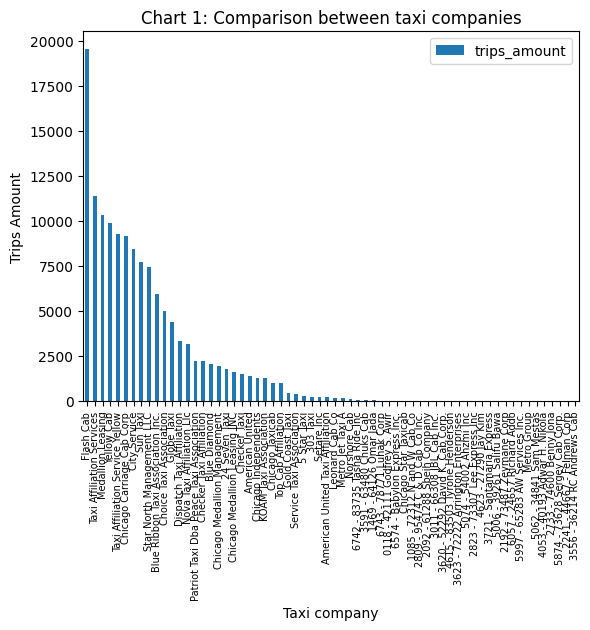

In [11]:
# Se procede a realizar un gráfico para analizar las empresas de taxis y la cantidad de viajes que realiza cada una
taxi_company.plot(x='company_name', y='trips_amount', kind='bar', title='Chart 1: Comparison between taxi companies',
                  xlabel='Taxi company', ylabel='Trips Amount')
plt.xticks(fontsize=7)
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! El gráfico es correcto y refleja adecuadamente el resultado esperado.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Para mejorar la visualización, podrías mostrar solo el top 10 o 20, enfocándote en las principales empresas.

</div>

</div>

##### Parece que, además de la compañía con un pico importante en la contabilización de viajes, hay 3 posibles grupos de taxis con magnitudes similares en su cantidad de viajes, se procede a calcular la cantidad de compañías de estos 3 posibles grupos: compañías que tienen entre 12000 y 6000 viajes, compañías que tienen entre 6000 y 1000 viajes; y compañías con menos de 1000 viajes

In [12]:
# Calculando la cantidad del primer grupo de taxis (cantidad de viajes entre 12000 y 6000)
len(taxi_company[(taxi_company['trips_amount'] < 12000) & (taxi_company['trips_amount'] >= 6000)])

8

In [13]:
# Calculando la cantidad del segundo grupo de taxis (cantidad de viajes entre 6000 y 1000)
len(taxi_company[(taxi_company['trips_amount'] < 6000) & (taxi_company['trips_amount'] >= 1000)])

16

In [14]:
# Calculando la cantidad del tercer grupo de taxis (cantidad de viajes menor a 1000)
len(taxi_company[taxi_company['trips_amount'] < 1000])

39

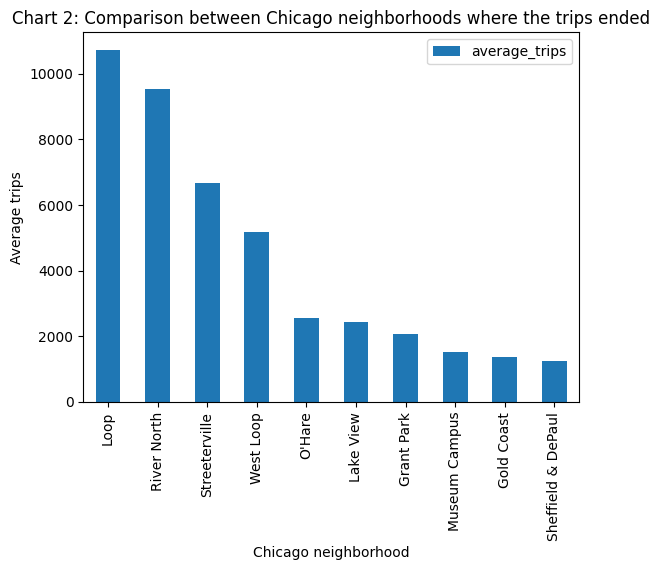

In [15]:
# Se procede a realizar un gráfico para analizar los 10 barrios principales por número de finalizaciones
location_trip[location_trip['dropoff_location_name'].isin(top_10_dropoff_location_name)].plot(x='dropoff_location_name', 
                y='average_trips', kind='bar', title='Chart 2: Comparison between Chicago neighborhoods where the trips ended',
                  xlabel='Chicago neighborhood', ylabel='Average trips')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico de barras con el top 10 por barrios es excelente y los resultados son los esperados. 

</div>

##### En base al gráfico 1 se concluye que la empresa de taxis Flash Cab es la que posee una mayor cantidad de viajes (en las fechas de interés) con casi 20000 viajes; cantidad que difiere notoriamente respecto de la siguiente compañía de taxis (Taxi Affiliation Services con aproximadamente 11000 viajes). Mediante el conteo de los grupos de taxis sugerido, se puede brindar el siguiente resumen sobre las empresas de taxi: La predominante posee una muy elevada cantidad de viajes respecto de la competencia, 8 poseen una cantidad importante de viajes, 16 poseen una cantidad media de viajes y 39 poseen una cantidad baja de viajes. En base a lo encontrado, se sugiere: 
##### 1. Estudiar la plataforma y medios de publicidad de las 8 empresas de taxi con cantidad importante de viajes para adaptarlas replicarlas en Zuber.
##### 2. Analizar y encontrar en qué se diferencia Flash Cab, la empresa de taxis predominante, de las 8 siguientes para, a mediano y largo, encontrar las innovaciones que probablemente implementaron en su servicio para destacar notoriamente de la competencia (se recomienda estudio comparativo de data relevante de Flash Cab respecto de las 8 siguientes empresas de taxi)
##### 3. Tomar la información de las 16 empresas con cantidad media de viajes para catalogar sus estrategias de llegada al público objetivo como estándar y mínimas ya que probablemente pertenezcan al común denominador que buscan sólo subsistir sin mayor interés en el crecimiento de la empresa.
##### 4. Estudiar con cuidado las estragias de las 39 empresas con cantidad baja de viajes y catalogarlas como no funcionales; además de encontrar buenas prácticas para las ventas de los viajes (basada en empresas exitosas) es importante tener identificadas aquellos planes que han demostrado no permitir alguna apreciable llegada de la empresa de taxis al público objetivo; para que así Zuber se aleje de esa zona riesgosa que la podría llevar a un riesgo financiero importante. 

##### En base al gráfico 2 se concluye que el barrio Loop es el que posee mayor interés de llegada de los viajes por parte de los usuarios (en noviembre del 2017) con aproximadamente 10700 viajes en promedio, valor no muy lejano del siguiente barrio de interés de llegada de los viajes: River North con aproximadamente 9500 viajes en promedio. En 3° y 4° lugar se encuentran los barrios Streeterville y West Loop con aproximadamente 6700 y 5200 respectivamente, los cuales son relativamente cercanos entre sí viendo el resultado gráfico de los 10 barrios con mayor interés, ya que el 1° y 2° lugar muestran una diferencia notoria del 3° y 4° lugar; y del 5° al 10° lugar (con apreciable similud en cantidad de viajes promedio entre sí) muestran también una diferencia notoria respecto del 3° y 4° lugar. Por ello, dentro del top 10 de barrios donde los taxis culminan sus viajes, se puede catalogar a:
##### A. Loop y River North como los barrios con mayor interés
##### B. Streeterville y West Loop como los barrios con intermedio interés
##### C. O'Hare, Lake View, Grant Park, Museum Coast y Sheffield & DePaul como los barrios con menor interés
##### En base a lo encontado, se sugiere:
##### 1. Analizar el contexto social (escuelas, viviendas, centros comerciales, centros hospitalarios, etc) cercanos a los barrios del grupo A para profundizar en los posibles motivos de la alta demanda de llegada a dichos barrios.
##### 2. Verificar si existe un patrón en los barrios de inicio de viaje de los taxis que llegan a los barrios del grupo A, es probable que una parte importante del público objetivo que llega a los barrios del grupo A también tengan una tendencia a iniciar sus viajes desde ciertas zonas de Chicago. Usar dicha información para establecer planes de llegada de Zuber a dichos posibles futuros usuarios (como por ejemplo descuentos por ir de los barrios típicos de inicio de viaje a los barrios del grupo A).
##### 3. Comparar la data disponible de los barrios del grupo A respecto del grupo B y encontrar aquellos posibles parámetros que causan que el primero en mención posea un mayor requerimiento de llegada (clima, contexto social, etc); se podría incorporar lo que pueda encontrarse en las estragias iniciales de marketing de Zuber.
##### 4. Considerar a los barrios del grupo C como posibles zonas estratégicas para la implementación de la plataforma de Zuber, si bien son los barrios con "menos interés", pertenecen al top 10 con mayor interés de llegada así que es posible que las otras empresas de taxi no brinden muchas opciones para llegar a dichas zonas las cuales podrían estar relacionadas con usuarios que desean ir a dichos barrios; y con Zuber podrían encontrar dicha solución a su requerimiento del servicio.
##### 5. Analizar la información temporal de la llegada de los taxis a los barrios de este top 10, es importante considerar las horas pico del requerimiento del servicio y encontrar su relación respecto de estos 10 barrios de Chicago para que la plataforma de Zuber contemple estrategias de alcance de usuarios en dichos intervalos de horas con mayor público objetivo.

### Paso 5. Prueba de hipótesis (Python)

In [16]:
# Carga el archivo de datos en un DataFrame
loop_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

In [17]:
# Información general del DataFrame loop_trips
loop_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
# Visualización de una muestra del DataFrame loop_trips
loop_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [19]:
# Procedemos a revisar si existen filas duplicadas explícitas en el DataFrame loop_trips
loop_trips.duplicated().sum()

197

##### En el caso de la tabla loop_trips, no se han encontrado valores nulos; además de que se ha verificado que las columnas weather_conditions y duration_seconds poseen los tipos de datos adecuados (object y float64 respectivamente) según la naturaleza de la información que brindan; además se observa que los nombres de las columnas poseen nombres adecuados (caractéres en minúscula y con guiones en lugar de espacios en blanco para separar palabras), por lo que no se requiere modificar dichos nombres. Sin embargo se han detectado 2 problemas:
##### 1. La columna start_ts posee el tipo de dato object, el cual es inadecuado para la información que brinda dicho campo (fecha y hora).
##### 2. Se han encontrado 197 duplicados explícitos; sin embargo, no se puede proceder directamente con la eliminación de todos estos duplicados ya que, de momento, no se puede afirmar que todos sean por error de registro. Quizás se pueda deber a otro motivo que requiere mayor profundidad de análisis y cuidado (ya que la información de esta tabla se usará para una prueba de hipótesis, sensible a la cantidad de información que se usará).

In [20]:
# Se procede a solucionar el primer problema; se convierte el tipo de dato de la columa start_ts de object a datetime
loop_trips['start_ts'] = pd.to_datetime(loop_trips['start_ts'])
# Procedemos a verificar el cambio del tipo de dato indicado
print(loop_trips['start_ts'].dtype)
print(loop_trips.info())

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


##### Problema 1 con los datos solucionado, procedemos a iniciar el análisis para plantear una solución al problema 2 con los datos

In [21]:
# Seleccionamos las filas con duplicados explícitos y los ordenamos para visualizar mejor dichos casos
duplicated_sorted = loop_trips[loop_trips.duplicated(keep=False)].sort_values(['start_ts', 'weather_conditions', 'duration_seconds'])
duplicated_sorted.head(20)

,start_ts,weather_conditions,duration_seconds
462,2017-11-04 05:00:00,Good,1200.0
541,2017-11-04 05:00:00,Good,1200.0
681,2017-11-04 06:00:00,Good,1267.0
682,2017-11-04 06:00:00,Good,1267.0
332,2017-11-04 07:00:00,Good,1140.0
979,2017-11-04 07:00:00,Good,1140.0
231,2017-11-04 07:00:00,Good,1200.0
933,2017-11-04 07:00:00,Good,1200.0
561,2017-11-04 07:00:00,Good,1260.0
1020,2017-11-04 07:00:00,Good,1260.0


##### Hemos encontrado casos donde la frecuencia de duplicados es mayor a 2; es decir, hay registros aparentemente triplicados. Se proceden a analizar los casos de las frecuencias con 2 o más coincidencias exactas en las 3 columnas de la tabla lopp_trips

In [22]:
# Se procede a analizar la frecuencia de los duplicados para los casos con 2 o más coincidencias exactas en las 3 columnas
duplicate_counts = loop_trips.groupby(['start_ts', 'weather_conditions', 'duration_seconds']).size()
print("Distribución de duplicados:")
print(duplicate_counts.value_counts().sort_index())

Distribución de duplicados:
1    756
2     74
3     21
4      9
5      6
6      2
7      1
8      2
dtype: int64


##### Se han encontrado casos donde incluso la plataforma ha registrado una frecuencia 8 filas con coincidencia exacta en las 3 columnas. Se considera que es muy poco probable que la plataforma haya tenido una falla que ocasionará registros de hasta 8 filas idénticas, procedemos a investigar más sobre los casos con mayor frecuencia de aparente repetición explícita de la tabla.

In [23]:
# Se procede a visualizar la información de las 3 columnas para los casos con mayor frecuencia de aparente duplicación de registros
high_duplicates = duplicate_counts[duplicate_counts > 5]
print("Casos con más de 5 duplicados:")
print(high_duplicates)

Casos con más de 5 duplicados:
start_ts             weather_conditions  duration_seconds
2017-11-11 06:00:00  Good                1260.0              8
                                         1380.0              7
2017-11-11 08:00:00  Good                1200.0              6
                                         1380.0              8
2017-11-11 16:00:00  Good                2400.0              6
dtype: int64


##### Encontramos que a las 6 am, 8 am y 4 pm se han registrado estas filas con alta frecuencia de aparente duplicación explícita. Tomando en cuenta que la tabla están analizando viajes hacia el aeropuerto, es conocido que estos suelen tener mayor tráfico de vuelos (generalmente) durante las primeras horas de la mañana; además de que coinciden con inicios típicos de jornadas laborales. Todo esto podría explicar lo relacionado a los registros con duplicados explícitos de la mañana. Con respecto a los duplicados explícitos de alta frecuencia a las 4 pm, esta hora coincide aproximadamente con el fin de jornadas laborales y posibles vuelos de la tarde, lo cual podría explicar la coincidencia exacta registrada. En base a lo profundizado para el problema 2 con los datos, concluimos que:
##### 1. Es muy poco probable que se haya generado una alta frecuencia de errores de registro por duplicación, por lo que consideraremos las frecuencias de 3 a más como correctas para la tabla lopp_trips. Eliminar todos los duplicados podría subestimar la demanda real en horas pico de tráfico, tomando en cuenta también que los casos con alta frecuencia de coincidencia exacta en los 3 campos podrían estar ocurriendo en las condiciones de alta demanda de taxis
##### 2. Es más probable que sólo los casos de la frecuencia 2 de duplicación explícita hayan sido generadas por error en la plataforma, por lo que se procederá a eliminar sólo dichos duplicados explícitos con frecuencia igual a 2 (es decir, aquellos casos donde sólo hay pares de filas exactamente iguales por tener mayor sospecha de ser errores del sistema).
##### 3. Aplicar esta metodología de solución, además de permitirnos conservar datos potencialmente válidos (como los casos con frecuencia de repetición 3 o más), elimina los errores más probables (filas con frecuencia de repetición igual a 2) y mantendrá la integridad del análisis para los futuros análisis a realizar ya que esta tabla se usará para una prueba de hipótesis, en donde debemos mantener la precisión de la información lo mejor posible.
##### 4. Sería ideal tener un campo adicional con algún identificados único en la tabla para así poder afirmar o negar con mayor certeza cuáles duplicados explícitos deberíamos considerar en los análisis.

In [24]:
# Se procede a eliminar sólo los duplicados explícitos con frecuencia igual a 2

# Identificamos sólo los casos con duplicados explícitos con frecuencia igual a 2
duplicate_counts = loop_trips.groupby(['start_ts', 'weather_conditions', 'duration_seconds']).size()
pairs_only = duplicate_counts[duplicate_counts == 2].index

# Generamos máscaras booleneas para identificar sólo los pares de filas que son duplicados explícitos, de las cuales sólo queremos eliminar 1 fila duplicada
mask_to_remove = loop_trips.set_index(['start_ts', 'weather_conditions', 'duration_seconds']).index.isin(pairs_only)
mask_duplicated = loop_trips.duplicated(['start_ts', 'weather_conditions', 'duration_seconds'])
# La primera máscara booleana servirá para remover las filas duplicadas (sólo de los pares de filas duplicadas), mientras que
# la segunda máscara booleana servirá para que sólo se elimine la segunda fila de este par de filas duplicadas donde se haya
# identificado la coincidencia exacta (y así no elminar ambas filas del par de filas duplicadas)

# Se procede a eliminar sólo los duplicados de los casos con exactamente 2 coincidencias idénticas
final_mask = mask_to_remove & mask_duplicated
loop_trips_cleaned = loop_trips[~final_mask]
# Al filtrar por la negación de la máscara booleana final, solicitamos no eliminar la primera fila del par de filas idénticas, sino
# sólo la segunda fila encontrada con coincidencia exacta de los pares de filas con duplicación explícita

# Verificamos la frecuencia actualizada de los duplicados
duplicate_counts_cleaned = loop_trips_cleaned.groupby(['start_ts', 'weather_conditions', 'duration_seconds']).size()
print("Distribución de duplicados actualizado:")
print(duplicate_counts_cleaned.value_counts().sort_index())

Distribución de duplicados actualizado:
1    830
3     21
4      9
5      6
6      2
7      1
8      2
dtype: int64


##### Problema 2 con los datos solucionado, procedemos a verificar la información de la tabla filtrada loop_trips_cleaned con la que, posteriormente, iniciaremos la prueba de hipótesis

In [25]:
# Información general del DataFrame loop_trips_cleaned
loop_trips_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            994 non-null    datetime64[ns]
 1   weather_conditions  994 non-null    object        
 2   duration_seconds    994 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 31.1+ KB


##### Se proceden a plantear primero las hipótesis nula y alternativa. En función de la prueba de hipótesis solicitada, encontramos que se refiere a que busca comparar el promedio de la duración de los viajes de 2 grupos:
##### Grupo 1: Viajes donde el día haya sido sábado y cuando el clima haya sido lluvioso (clima malo)
##### Grupo 2: Viajes donde el día haya sido cualquiera menos sábado o cuando el clima haya sido soleado (clima bueno)
##### Por lo anterior analizamos también entonces que los grupos 1 y 2 son independientes entre sí, ya que por condiciones lógicas no es posible que una fila de la tabla cumpla con las condiciones para pertencer a ambos grupos a la vez, por lo que los grupos 1 y 2 no poseen intersección. Además podemos afirmar que la unión de los grupos 1 y 2 es igual al conjunto universal de los datos de la tabla con la se efectuará la prueba de hipótesis. Tomando todo esto en cuenta, planteamos a continuación las hipótesis:
##### Hipótesis Nula H0: No hay diferencia en el promedio de duración de viajes realizados entre los días sábados lluviosos y el resto de días
##### Hipótesis Alternativa H1: Sí hay diferencia en el promedio de duración de viajes realizados entre los días sábados lluviosos y el resto de días
##### Con respecto al tipo de análisis, decido utilizar la prueba de dos colas (bilateral) en donde se aplicará la prueba t debido a que:
##### 1. La prueba de hipótesis se ha planteado para muestras independientes entre sí.
##### 2. Las varianzas de los grupos son desconocidas.
##### 3. No se me especifica que el promedio de duración aumente o disminuya, sólo se me indica que cambia en la prueba de hipótesis solicitada.
##### Para terminar de sustentar la confirmación de la prueba elegida, se verificarán los siguientes supuestos:
##### Supuesto A: Los datos de los grupos 1 y 2 siguen una distribución normal.
##### Supuesto B: Los tamaños de muestra de los grupos 1 y 2 son lo suficientemente grandes.
##### Para la elección del nivel de significación alfa se ha escogida 0.05 por ser un estándar ampliamente aceptado en análisis estadísticos de esta naturaleza.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo formulando la hipótesis! Es fundamental que sea claro lo que se busca analizar.

</div>

In [26]:
# Realizamos los filtrados requeridos para crear la data independiente para los grupos 1 y 2 planteados

# Creando la data para el grupo 1
group_1 = loop_trips_cleaned[(loop_trips_cleaned['start_ts'].dt.day_name() == 'Saturday') & (loop_trips_cleaned['weather_conditions'] == 'Bad')]

# Creando la data para el grupo 2
group_2 = loop_trips_cleaned[~((loop_trips_cleaned['start_ts'].dt.day_name() == 'Saturday') & (loop_trips_cleaned['weather_conditions'] == 'Bad'))]

# Verificamos que la suma de las filas de cada grupo coincida con la suma de las filas de la tabla loop_trips_cleaned
print(f"Grupo 1: {len(group_1)} filas")
print(f"Grupo 2: {len(group_2)} filas") 
print(f"Total: {len(group_1) + len(group_2)} = {len(loop_trips_cleaned)}")

Grupo 1: 165 filas
Grupo 2: 829 filas
Total: 994 = 994


Text(0.5, 1.0, 'Group 2: Other Conditions')

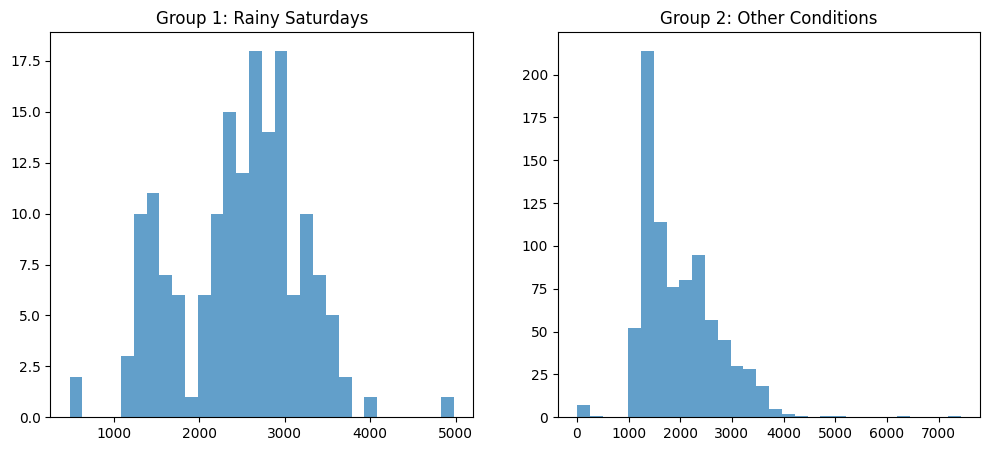

In [27]:

# Procedemos a verificar el supuesto A para aplicar la prueba t


# Visualizamos los histogramas los de los grupos 1 y 2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(group_1['duration_seconds'], bins=30, alpha=0.7)
plt.title('Group 1: Rainy Saturdays')

plt.subplot(1, 2, 2)
plt.hist(group_2['duration_seconds'], bins=30, alpha=0.7)
plt.title('Group 2: Other Conditions')

In [28]:
# Procedemos a verificar el supuesto B para aplicar la prueba t

print(f"Tamaño Grupo 1: {len(group_1)}")
print(f"Tamaño Grupo 2: {len(group_2)}")

Tamaño Grupo 1: 165
Tamaño Grupo 2: 829


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Perfecto! Excelente análisis Diego

</div>

##### Las distribuciones de los grupos 1 y 2 no son perfectamente normales; sin embargo, se ha verificado que tanto el grupo 1 como el grupo 2 poseen una muestra con una población mayor o igual a 30, por lo que podemos afirmar que la prueba t es robusta; a pesar de que las distribuciones de estos grupos independientes no sean perfectamente normales.

In [29]:
# Iniciamos la prueba de hipótesis mediante la metodología planteada

# Para la presente prueba de hipótesis se ha propuesto usar un valor de umbral del 5%
alpha = 0.05

# Para generar mayor precisión al análisis de la prueba t en este cado de varianzas desconocidas, se está aplicando equal_var=False
comparisson_results = st.ttest_ind(group_1['duration_seconds'] , group_2['duration_seconds'], equal_var=False)

# Visualizamos el resultado del valor p del análisis
print('p value:', comparisson_results.pvalue)

# Método a aplicar para la conclusión final: Si el valor p obtenido es menor que alpha, rechazaremos la hipótesis nula; de lo contrario, la aceptaremos
if comparisson_results.pvalue < alpha:
    print("We reject the null hypothesis: There is a difference in the average duration of trips made between rainy Saturdays and the rest of the days.")
else:
    print("We cannot reject the null hypothesis: There isn't difference in the average duration of trips made between rainy Saturdays and the rest of the days.")

p value: 3.3960817168641617e-12
We reject the null hypothesis: There is a difference in the average duration of trips made between rainy Saturdays and the rest of the days.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 

</div>

##### Como indica el resultado final, la prueba de hipótesis señala que no puede rechazarse la hipótesis nula planteada, por lo que afirmamos entonces que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos (para un valor de umbral del 5 %).